In [3]:
import numpy as np 
from scipy import constants as c 
import matplotlib.pyplot as plt 
from scipy import signal as sig 

(0.0, 0.0022222222222222222)

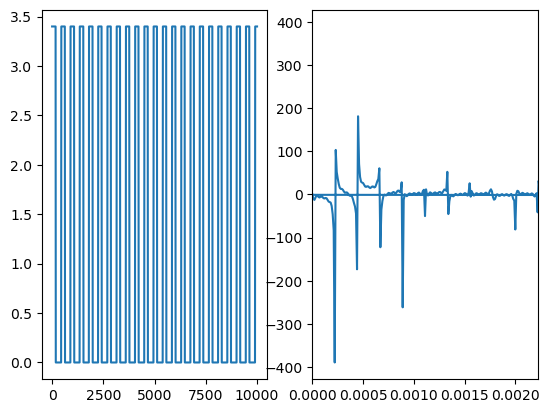

In [11]:
fig,ax = plt.subplots(1,2)
x = np.linspace(0,10000,1000)
du = 86*2/450
nx = 3.4*.5*(1+sig.square(2*np.pi*x/450,duty=du))
ax[0].plot(x,nx)
ftransform = np.fft.fft(nx)
ffreq = np.fft.fftfreq(1000,100000/1000)
ax[1].plot(ffreq,np.imag(ftransform))
ax[1].set_xlim(0,1/450)



In [2]:
1.5*150

225.0

In [1]:
#Siqi message  new for 2012

a = 555 
print(a,"is a timer I adore")

555 is a timer I adore
